# Modeling Wine Quality with Multivariate Linear Regression
In this mini-project, multivariate linear regression has been implemented to predict the quality of wine based on a series of measured physicochemical properties of the wine. 

The data used herein comes from the following source:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

## Cleaning the Data and Exploratory Analysis
In this section, the raw data is opened and exploratory analysis has been performed to familiarise with the data set. 

In [2]:
data_red = pd.read_csv('winequality-red.csv', sep=";")
data_wht = pd.read_csv('winequality-white.csv', sep=";")

In [3]:
data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data_wht.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
# Separate the input variables (features) and output variables (target) of the model.
X_red = data_red.iloc[:,1:11]; y_red = data_red.iloc[:,-1]
X_wht = data_wht.iloc[:,1:11]; y_wht = data_wht.iloc[:,-1]

In [6]:
# Check the size of the red wine data set
print(X_red.shape)

(1599, 10)


In [7]:
# Check the size of the white wine data set
print(X_wht.shape)

(4898, 10)


In [8]:
X_wht.describe()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


In [9]:
features = list(X_wht.columns.values)

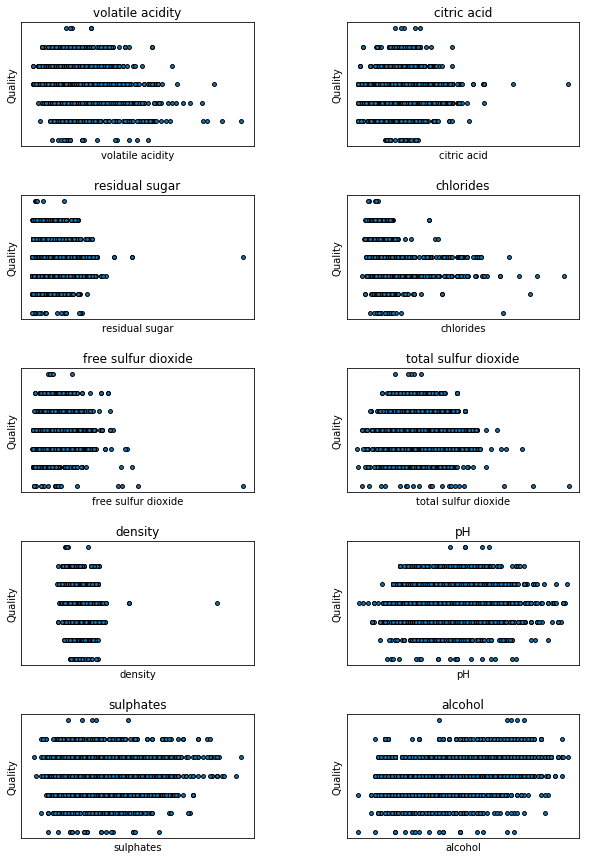

In [10]:
# Set-up 5x2 grid for plotting.
fig, sub = plt.subplots(5, 2, figsize=(10,15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for feature, ax in zip(features, sub.flatten()):
    
    ax.scatter(X_wht[feature], y_wht, s=15, edgecolors='k')
    ax.set_xlabel(feature)
    ax.set_ylabel('Quality')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(feature)

## Preparing Data for Linear Regression

For the remained for the analysis, only the white wine data set has been considered. However, before building and training the model, the feature variables are scaled using mean normalization and then the dataset is partitioned into training (80%) and testing (20%) dataset. 

In [11]:
# Mean Normalization
mu = X_wht.mean(axis=0)
sigma = X_wht.std(axis=0)
X_n = (X_wht - mu) / sigma

In [12]:
# Add a column of ones for the bias term
X_n['bias'] = np.ones(len(X_n))

In [13]:
# Partioning into Training and Test Data
indices = np.random.permutation(X_n.shape[0])
pctg = round(0.8*len(X_n))
training_idx, test_idx = indices[:pctg], indices[pctg:]
X_trn, X_tst = X_n.loc[training_idx,:], X_n.loc[test_idx,:]
y_trn, y_tst = y_wht[training_idx], y_wht[test_idx]

## Model Formulation and Training the Model

In [14]:
# Initial values for paramters
theta = np.zeros([X_trn.shape[1], 1])
X_trn = np.matrix(X_trn)
y_trn = np.matrix(y_trn).T

In [16]:
# Check the dimensions of the matrices and arrays
"""
X_trn - m x n matrix
y_trn - m x 1 vector
theta - n x 1 vector
"""
print(X_trn.shape); print(y_trn.shape); print(theta.shape); 

(3918, 11)
(3918, 1)
(11, 1)


In [17]:
# Calculate the cost function
def costFunc(X_trn, y_trn, theta):

    m = len(X_trn)
    return (1/(2*m)) * np.sum(np.square((np.dot(X_trn, theta)) - y_trn))
 
print(costFunc(X_trn, y_trn, theta))

17.7067381317


Text(0.5,1,'Gradient Descent')

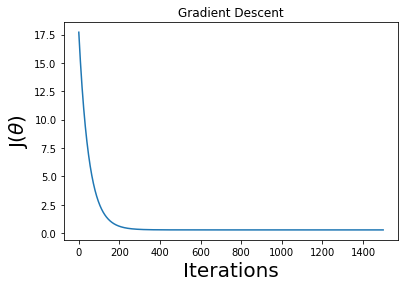

In [19]:
# Gradient descent algorithm to minimise cost function
J_hist = []
theta_hist = []

alpha = 0.01
iterations = 1500

def gradDesc(X_trn, y_trn, theta, alpha, iterations):
    
    m = len(X_trn)
    
    for i in range(0,iterations):
    
        J_hist.append(costFunc(X_trn, y_trn, theta))
        theta = theta - (alpha/m) * np.sum(np.multiply(((np.dot(X_trn, theta)) - y_trn), X_trn), axis = 0).T
        theta_hist.append(theta)

    return J_hist, theta, theta_hist

# Run the gradient descent and plot the convergence
J_hist, theta, theta_hist = gradDesc(X_trn, y_trn, theta, alpha, iterations)
plt.plot(J_hist)
plt.xlabel('Iterations',fontsize=20)
plt.ylabel(r'J($\theta$)',fontsize=20)
plt.title('Gradient Descent')

## Testing the Accuracy of the Model

In [20]:
# Initial values for paramters
X_tst = np.matrix(X_tst)
y_tst = np.matrix(y_tst).T

In [21]:
# Estimate wine quality based on optimized theta for the test set
h_tst = np.dot(X_tst, theta)

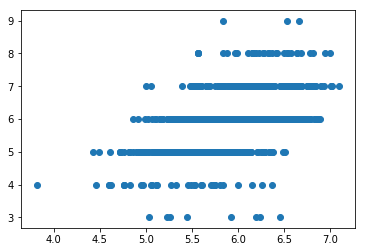

In [22]:
plt.scatter(np.array(h_tst),np.array(y_tst))